In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb

np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
stocks = pd.read_csv('data_stocks.csv')

In [3]:
stocks.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
str_list = []
for colname, colvalue in stocks.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)

# Get to the numeric columns by inversion
num_list = stocks.columns.difference(str_list)

stocks_num = stocks[num_list]

In [5]:
stocks_num.head()

,DATE,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,SP500
0,1491226200,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2363.6101
1,1491226260,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2364.1001
2,1491226320,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2362.6799
3,1491226380,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2364.3101
4,1491226440,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2364.8501


In [6]:
type(stocks_num)

pandas.core.frame.DataFrame

In [12]:
stocks_num = stocks_num.fillna(value=0, axis=1)

X = stocks_num.values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [23]:
from numpy import vstack,array
from numpy.random import rand
from math import sqrt

In [26]:
#Calculate percentage return and volatilities over the period
returns = stocks_num.pct_change().mean() * 109
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = stocks_num.pct_change().std() * sqrt(109)

returns.head()

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

Text(0.5,1,'Elbow curve')

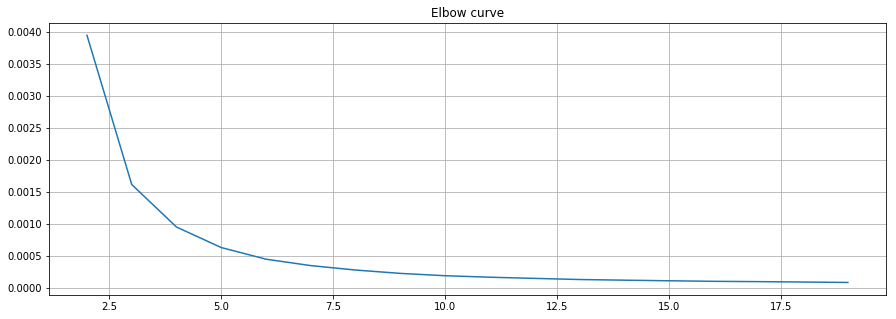

In [27]:
X = returns
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

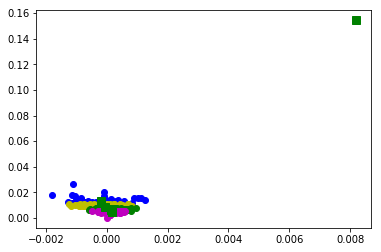

In [30]:
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)

# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

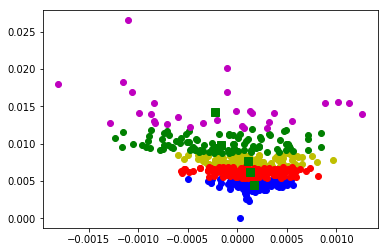

In [31]:
#drop the relevant stock from our data
returns.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()